In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import pearsonr
import statsmodels.api as sm
#모델링
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# df1=pd.read_csv('C:/Users/user-pc/Desktop/수원시 24.3~25.3/24년 3월.csv')
# df2=pd.read_csv('C:/Users/user-pc/Desktop/수원시 24.3~25.3/24년 4월.csv')
# df3=pd.read_csv('C:/Users/user-pc/Desktop/수원시 24.3~25.3/24년 5월.csv')
# df4=pd.read_csv('C:/Users/user-pc/Desktop/수원시 24.3~25.3/24년 6월.csv')
# df5=pd.read_csv('C:/Users/user-pc/Desktop/수원시 24.3~25.3/24년 7월.csv')
# df6=pd.read_csv('C:/Users/user-pc/Desktop/수원시 24.3~25.3/24년 8월.csv')
# df7=pd.read_csv('C:/Users/user-pc/Desktop/수원시 24.3~25.3/24년 9월.csv')
# df8=pd.read_csv('C:/Users/user-pc/Desktop/수원시 24.3~25.3/24년 10월.csv')
# df9=pd.read_csv('C:/Users/user-pc/Desktop/수원시 24.3~25.3/24년 11월.csv')
# df10=pd.read_csv('C:/Users/user-pc/Desktop/수원시 24.3~25.3/24년 12월.csv',encoding="cp949")
# df11=pd.read_csv('C:/Users/user-pc/Desktop/수원시 24.3~25.3/25년 1월.csv')
# df12=pd.read_csv('C:/Users/user-pc/Desktop/수원시 24.3~25.3/25년 2월.csv')
# df13=pd.read_csv('C:/Users/user-pc/Desktop/수원시 24.3~25.3/25년 3월.csv')

In [3]:
# df_c = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13],ignore_index=True)

In [4]:
# df_c1 = pd.read_csv('C:/Users/user-pc/Downloads/suwon_temp_2024to2025/suwon_temp_2024to2025/권선구.csv')

In [5]:
# df_c

In [6]:
# df = df_c[['ta_ymd','cty_rgn_no','card_tpbuz_nm_2','sex','age','hour','amt','cnt','day']]

In [7]:
# df

In [8]:
# df = df[df['card_tpbuz_nm_2']=='커피/음료']

In [9]:
# df

In [10]:
# df = df.drop(columns=['card_tpbuz_nm_2'])

In [11]:
# df

In [12]:
# df = df.reset_index(drop=True)

In [13]:
# df

In [14]:
# df_c1.rename(columns={'Date':'ta_ymd'},inplace=True)

In [15]:
# df_map = df_c1.set_index('ta_ymd')['AvgTemp'].to_dict()

In [16]:
# matched_temp = df['ta_ymd'].map(df_map)

In [17]:
# df['AvgTemp'] = matched_temp

In [18]:
# df

In [19]:
# df.to_csv('C:/Users/user-pc/Desktop/수원시 24.3~25.3/df_coffee_권선구.csv')

In [20]:
df=pd.read_csv('C:/Users/user-pc/Desktop/수원시 24.3~25.3/df_coffee_권선구.csv')

In [21]:
df

,Unnamed: 0,ta_ymd,cty_rgn_no,sex,age,hour,amt,cnt,day,AvgTemp
0,0,20240301,41111,F,4,1,14080,2,5,-4.523944
1,1,20240301,41111,F,7,1,13767,2,5,-4.523944
2,2,20240301,41111,M,3,1,18617,3,5,-4.523944
3,3,20240301,41111,M,4,1,6258,2,5,-4.523944
4,4,20240301,41111,M,6,1,14596,3,5,-4.523944
...,...,...,...,...,...,...,...,...,...,...
1736308,1736308,20250331,41117,F,4,10,17503,2,1,8.224742
1736309,1736309,20250331,41117,F,6,10,102472,2,1,8.224742
1736310,1736310,20250331,41117,M,3,10,3442,2,1,8.224742
1736311,1736311,20250331,41117,M,5,10,135210,3,1,8.224742


In [22]:
df = df.drop(columns=['Unnamed: 0'])

In [23]:
df

,ta_ymd,cty_rgn_no,sex,age,hour,amt,cnt,day,AvgTemp
0,20240301,41111,F,4,1,14080,2,5,-4.523944
1,20240301,41111,F,7,1,13767,2,5,-4.523944
2,20240301,41111,M,3,1,18617,3,5,-4.523944
3,20240301,41111,M,4,1,6258,2,5,-4.523944
4,20240301,41111,M,6,1,14596,3,5,-4.523944
...,...,...,...,...,...,...,...,...,...
1736308,20250331,41117,F,4,10,17503,2,1,8.224742
1736309,20250331,41117,F,6,10,102472,2,1,8.224742
1736310,20250331,41117,M,3,10,3442,2,1,8.224742
1736311,20250331,41117,M,5,10,135210,3,1,8.224742


# 결측치 처리

In [24]:
df=df.dropna()

In [25]:
df.isna().sum()

ta_ymd        0
cty_rgn_no    0
sex           0
age           0
hour          0
amt           0
cnt           0
day           0
AvgTemp       0
dtype: int64

In [26]:
df

,ta_ymd,cty_rgn_no,sex,age,hour,amt,cnt,day,AvgTemp
0,20240301,41111,F,4,1,14080,2,5,-4.523944
1,20240301,41111,F,7,1,13767,2,5,-4.523944
2,20240301,41111,M,3,1,18617,3,5,-4.523944
3,20240301,41111,M,4,1,6258,2,5,-4.523944
4,20240301,41111,M,6,1,14596,3,5,-4.523944
...,...,...,...,...,...,...,...,...,...
1736308,20250331,41117,F,4,10,17503,2,1,8.224742
1736309,20250331,41117,F,6,10,102472,2,1,8.224742
1736310,20250331,41117,M,3,10,3442,2,1,8.224742
1736311,20250331,41117,M,5,10,135210,3,1,8.224742


# 수치형,범주형 변수 분류

In [27]:
num_cols = df.select_dtypes(include=['float64','int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

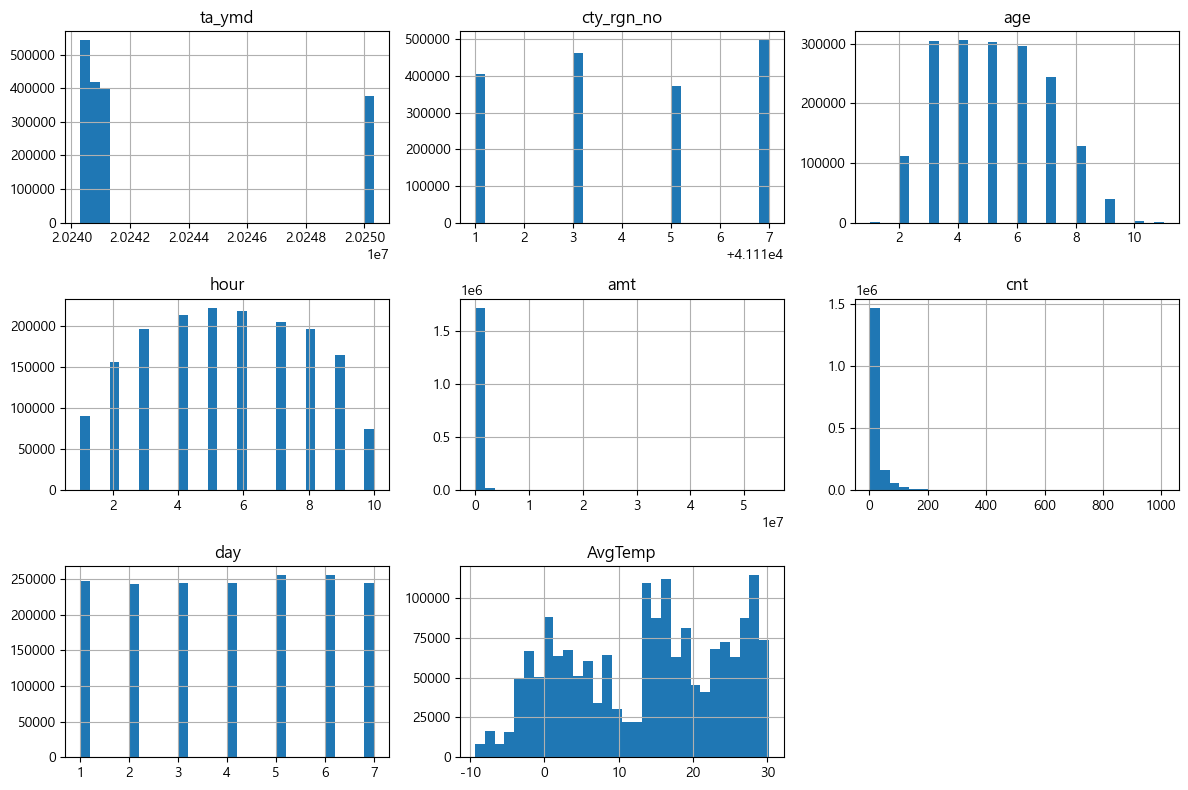

In [28]:
#수치형 변수 히스토그램
df[num_cols].hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.show()

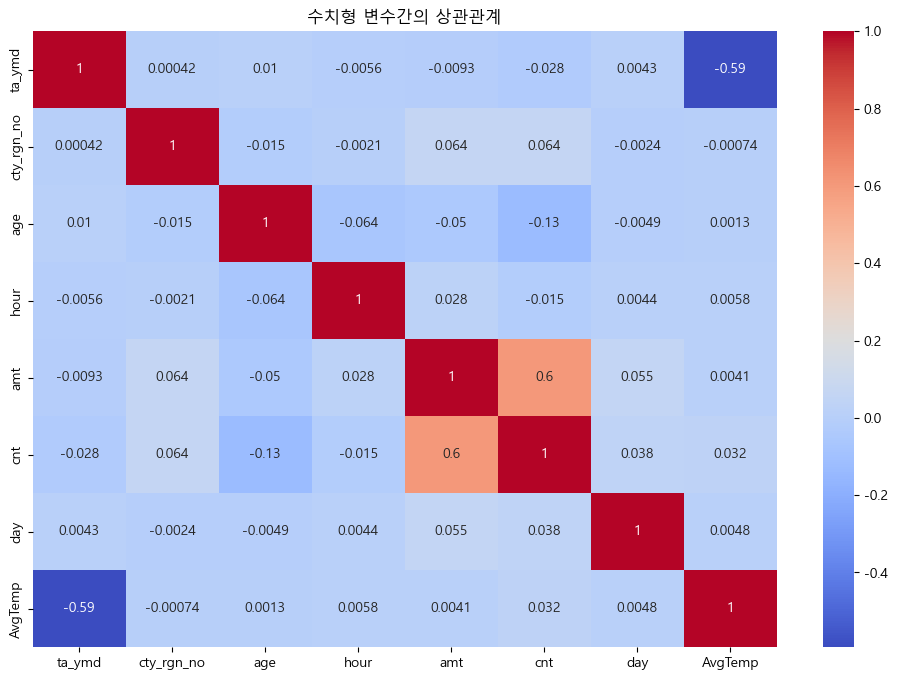

In [29]:
#수치형 변수 상관관계 히트맵
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('수치형 변수간의 상관관계')
plt.show()

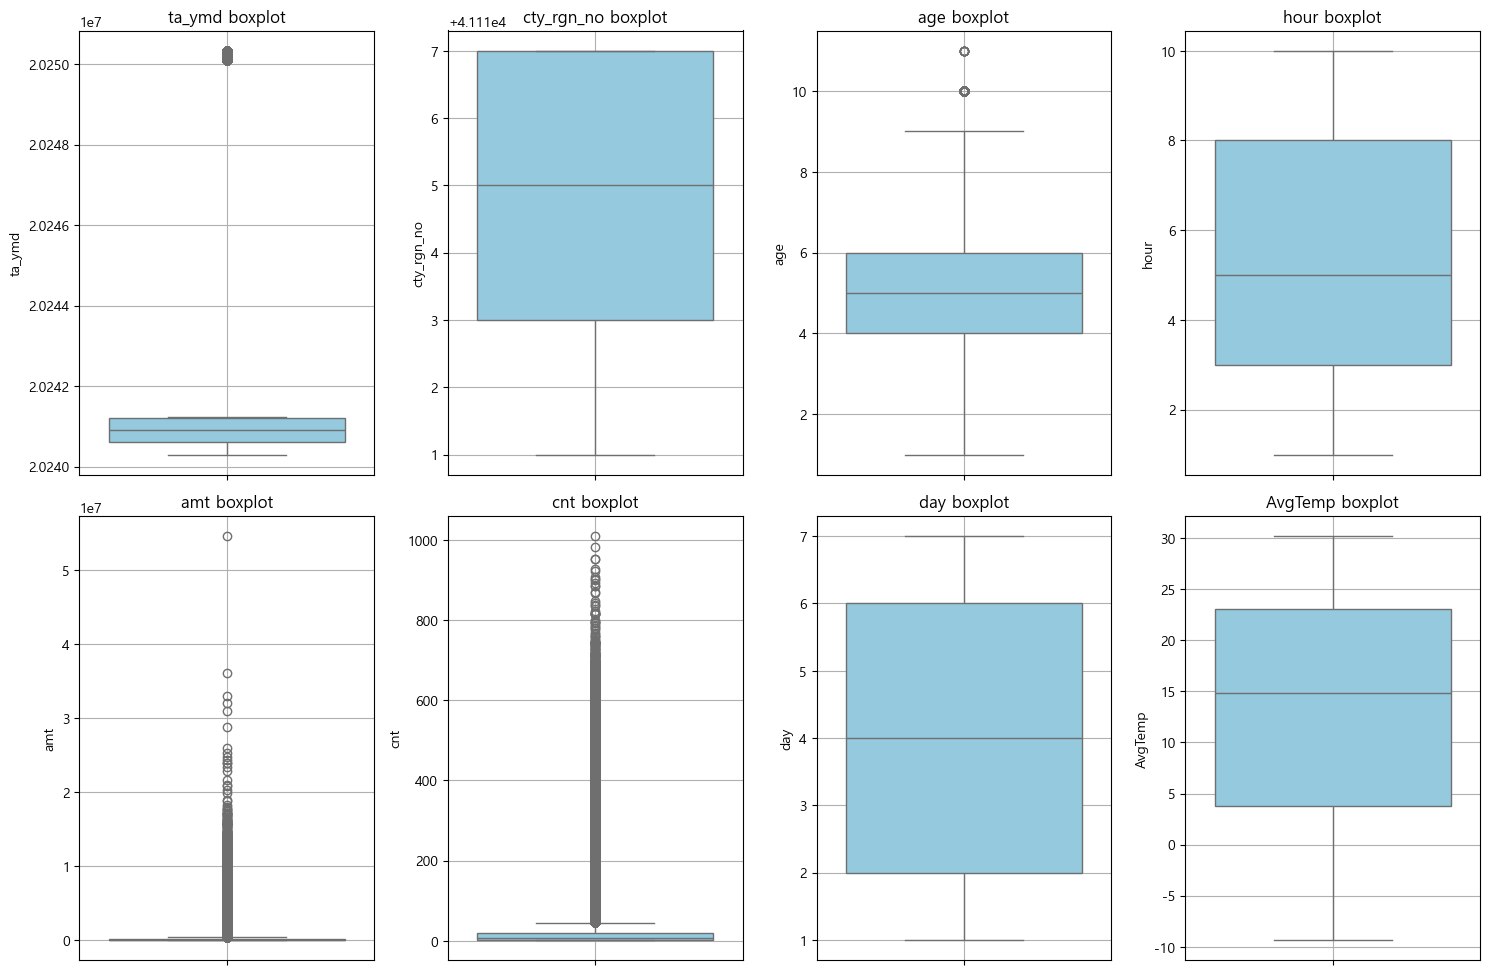

In [30]:
#박스플롯으로 분포와 이상치 확인하기
plt.figure(figsize=(15,10))

for i, col in enumerate(num_cols):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'{col} boxplot')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [31]:
#amt, cnt가 이상치가 많아 로그 변환 후 재시도
df['amt'] = np.log1p(df['amt'])
df['cnt'] = np.log(df['cnt'])

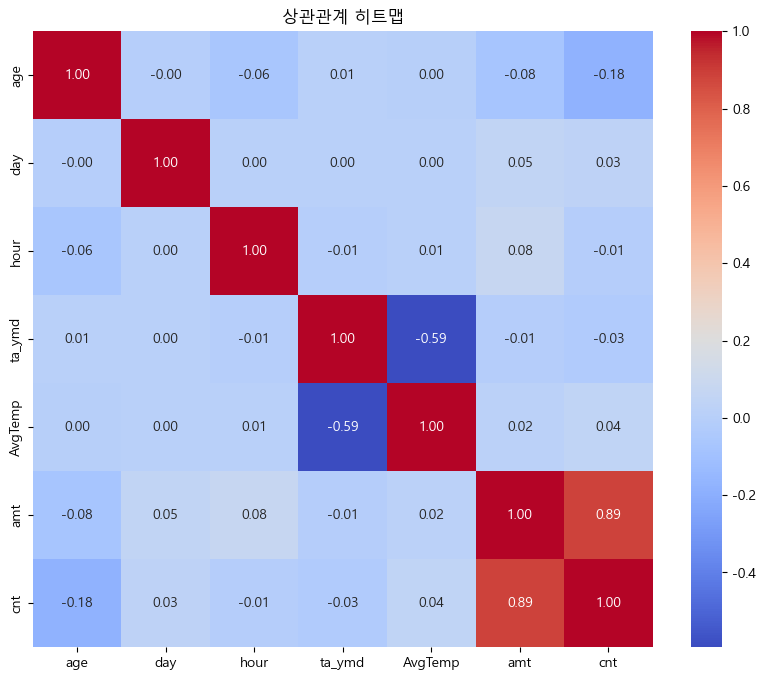

In [32]:
# 상관관계 분석 (로그 변환 후)
features = ['age', 'day', 'hour', 'sex','ta_ymd','AvgTemp']
corr = df[features + ['amt', 'cnt']].corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('상관관계 히트맵')
plt.show()

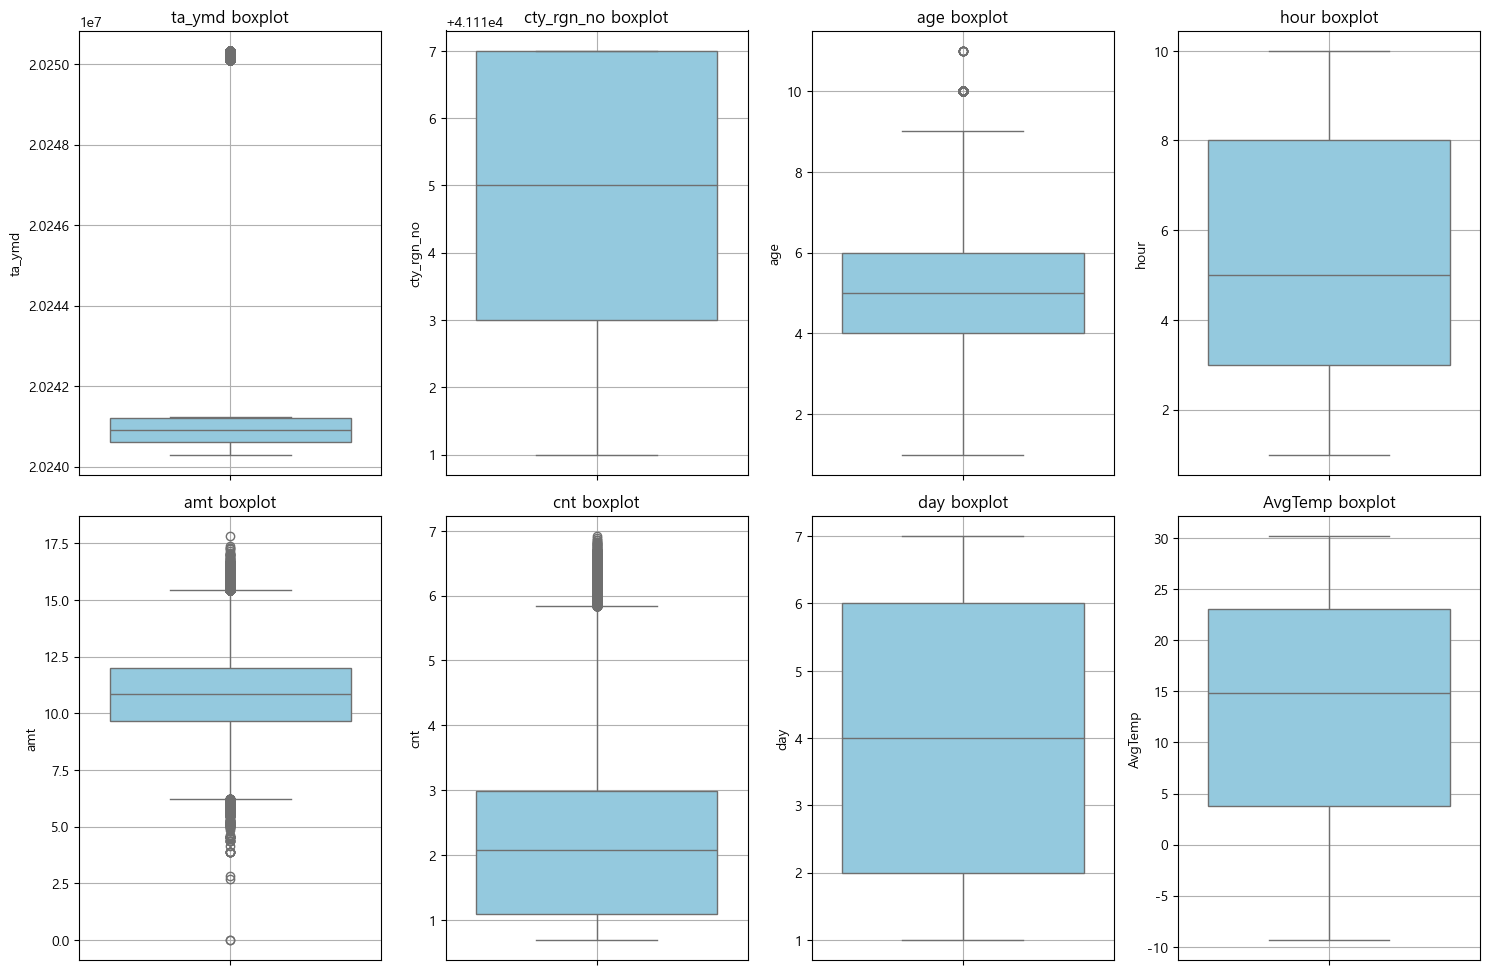

In [33]:
#박스플롯으로 분포와 이상치 다시 확인하기
plt.figure(figsize=(15,10))

for i, col in enumerate(num_cols):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'{col} boxplot')
    plt.grid(True)

plt.tight_layout()
plt.show()
#1. 중앙값 위치 : ta_ymd, amt, cnt, day는 중앙선이 가운데쯤 있으므로 대칭분포 / age, hour는 비대칭 분포
#2. 박스 너비(IQR) : 박스가 넓으면 데이터 분포가 퍼져 있는 것이고, 좁으면 분포가 조밀한 것
#3. 수염 길이 : age 처럼 긴 수염을 가지고 있으면 극단적인 값이 존재하는 것이고 cnt처럼 수염이 비대칭이면 분포가 한쪽으로 치우쳐 있다는 것
#4. 이상치 : 로그변환을 하였음에도 불구하고 amt와 cnt는 여전히 이상치(점의 형태)가 남아있는 모습이다.

# 가설검정
- 1 기온(X:AvgTemp)은 커피 매출(y:amt)에 있어서 상관관계가 있지 않다. (회귀분석)
- 2 성별(X : sex)에 따라 매출(y:amt)에 영향이 있지 않다.(회귀분석)
- 3 커피 매장을 운영하면서 특정 외부 요인(X:모든 변수)에 의해 성별(y:sex)을 예측할 수 없다. (분류분석)
- 4 요일(X:day_of_week)에 따른 평균 커피 매출(y: amt) 은 영향이 없다.(회귀분석)
- 5 연령별 매출금액의 소비 수준(금액을 많이 쓰고 적게 쓰는 정도)패턴을 파악하기. (군집분석)

# 1. 기온과 커피 매출의 상관관계(회귀)
# H_0(귀무가설) : 기온에 따라 매출 영향을 미치지 않는다.
# H_1(대립가설) : 기온에 따라 매출 영향을 미친다.

In [34]:
corr, p_value = pearsonr(df['AvgTemp'],df['amt'])

print(f"상관계수 : {corr}")
print(f"p값 : {p_value}")
#기온과 매출은 유의미한 관계는 있지만 거의 없는 것처럼 약하다.

상관계수 : 0.01707665463305859
p값 : 3.8442665126135742e-112


# 2. 성별이 커피 매출에 끼치는 영향(회귀)
# H_0(귀무가설) : 성별에 따라 매출 영향을 미치지 않는다.
# H_1(대립가설) : 성별에 따라 매출 영향을 미친다.
- 대립가설 채택 : 성별이 매출 영향에 큰 기여를 하진 않으나 미약하게나마 성별에 따라 매출 금액의 영향을 미친다.✅

In [36]:
#성별에 따라 가장 영향을 많이 받는 변수 알아보기
#다만 p-value값이 대부분 0.05보다 작으므로 F값은 값이 클수록 집단 간 유의미한 관계가 있다고 볼 수 있으므로 F값이 크면서 p-value값이 작은 값들을 찾아보면
#sex : cnt > amt > age > ta_ymd > AvgTemp > hour > cty_rgn_no 순으로 변수와 유의미한 관계가 있다.
#통계적으로 성별은 cnt의 영향을 제일 많이 받음을 알 수 있으며, 성별에 따라 커피 매출에 어느정도 영향을 받음을 알 수 있다.
for cat in cat_cols:
    for num in num_cols:
        groups = [df[df[cat]==level][num]for level in df[cat].unique()]

        if len(groups)>1:
            stat, p = f_oneway(*groups)
            print(f"{num} vs {cat} > F-{stat:.2f}, p-value={p:.7f}")
            if p < 0.05:
                print(f"유의수준 0.05보다 작으므로 귀무가설 기각.")
                print(f"성별에 따라 {num}에 대해 영향을 미친다.")
            else:
                print(f"유의수준 0.05보다 크므로 귀무가설 채택")
                print(f"성별에 따라 {num}에 영향을 미치지 않는다.")
        else:
            print("그룹 수 부족")

ta_ymd vs sex > F-28.41, p-value=0.0000001
유의수준 0.05보다 작으므로 귀무가설 기각.
성별에 따라 ta_ymd에 대해 영향을 미친다.
cty_rgn_no vs sex > F-2.06, p-value=0.1509635
유의수준 0.05보다 크므로 귀무가설 채택
성별에 따라 cty_rgn_no에 영향을 미치지 않는다.
age vs sex > F-75.97, p-value=0.0000000
유의수준 0.05보다 작으므로 귀무가설 기각.
성별에 따라 age에 대해 영향을 미친다.
hour vs sex > F-56.71, p-value=0.0000000
유의수준 0.05보다 작으므로 귀무가설 기각.
성별에 따라 hour에 대해 영향을 미친다.
amt vs sex > F-270.31, p-value=0.0000000
유의수준 0.05보다 작으므로 귀무가설 기각.
성별에 따라 amt에 대해 영향을 미친다.
cnt vs sex > F-942.87, p-value=0.0000000
유의수준 0.05보다 작으므로 귀무가설 기각.
성별에 따라 cnt에 대해 영향을 미친다.
day vs sex > F-8.14, p-value=0.0043372
유의수준 0.05보다 작으므로 귀무가설 기각.
성별에 따라 day에 대해 영향을 미친다.
AvgTemp vs sex > F-19.69, p-value=0.0000091
유의수준 0.05보다 작으므로 귀무가설 기각.
성별에 따라 AvgTemp에 대해 영향을 미친다.


In [37]:
#모델링 시작
df['sex'] = LabelEncoder().fit_transform(df['sex'])

In [38]:
X_amt = df[['sex','cnt', 'age','ta_ymd', 'hour', 'day','AvgTemp','cty_rgn_no']]
y_amt = df['amt']

In [39]:
X_train, X_test, y_amt_train, y_amt_test = train_test_split(X_amt,y_amt,test_size=0.2, random_state=42)
model_amt = LGBMRegressor().fit(X_train, y_amt_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 783
[LightGBM] [Info] Number of data points in the train set: 1389050, number of used features: 8
[LightGBM] [Info] Start training from score 10.835839


In [40]:
# RMSE(amt) : 약 0.6681 > 로그 역변환 시 log_e 0.6681 = 약 0.95배 오차, R^2 = 약 0.8315 
# 이 값들로 하여금 이 amt는 83.15% 설명력을 보이는 모델이다. > 모델 성능이 우수함
y_pred_amt = model_amt.predict(X_test)
print("RMSE (amt):",np.sqrt(mean_squared_error(y_amt_test,y_pred_amt)))
print("R^2 (amt):",r2_score(y_amt_test,y_pred_amt))

RMSE (amt): 0.6681296529606043
R^2 (amt): 0.8315403126720473


In [41]:
#피처 엔지니어링 실행
# 일단 날짜를 datetime으로 변환
df['ta_ymd'] = pd.to_datetime(df['ta_ymd'])

# 고객 기준 최근 7일 누적 소비 금액
df = df.sort_values(by=['sex', 'age', 'ta_ymd'])  # 고객 proxy: sex + age
df['past_7day_amt'] = df.groupby(['sex', 'age'])['amt'].transform(lambda x: x.rolling(window=7, min_periods=1).sum())

# 고객 기준 최근 30일 누적 구매 횟수
df['past_30day_cnt'] = df.groupby(['sex', 'age'])['cnt'].transform(lambda x: x.rolling(window=30, min_periods=1).sum())

# 고객의 평균 방문당 지출 금액
df['mean_amt_per_visit'] = df['amt'] / (df['cnt'] + 1e-5)  # 분모 0 방지

# # 결측치 처리 (필요시)
# df.fillna(0, inplace=True)

# 피처 선택
features_amt = ['sex', 'age', 'hour', 'day',
            'past_7day_amt', 'past_30day_cnt', 'mean_amt_per_visit', 'AvgTemp', 'cty_rgn_no']
X = df[features_amt]
y_amt = df['amt']
#모델링(다양한 수치형 변수들을 바탕으로 구매횟수를를 예측하는 분류 모델)
X_amt_train, X_amt_test, y_amt_train, y_amt_test = train_test_split(X, y_amt, test_size=0.2, random_state=42)
model = LGBMRegressor()
model.fit(X_amt_train, y_amt_train)
y_pred_amt = model.predict(X_amt_test)
y_amt_rmse = np.sqrt(mean_squared_error(y_amt_test, y_pred_amt))
y_amt_r2_score = r2_score(y_amt_test,y_pred_amt)
print("RMSE:", y_amt_rmse)
print("즉, log_1p {} = 약 {:.2f}배의 오차가 있다.".format(y_amt_rmse,np.expm1(y_amt_rmse)))
print("R^2 (amt):", y_amt_r2_score)
print("또한, 이 모델은 {:.2f}%의 설명력을 가진다.".format(y_amt_r2_score * 100))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006751 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1049
[LightGBM] [Info] Number of data points in the train set: 1389050, number of used features: 9
[LightGBM] [Info] Start training from score 10.836968
RMSE: 0.6159071735503447
즉, log_1p 0.6159071735503447 = 약 0.85배의 오차가 있다.
R^2 (amt): 0.8576283134868126
또한, 이 모델은 85.76%의 설명력을 가진다.


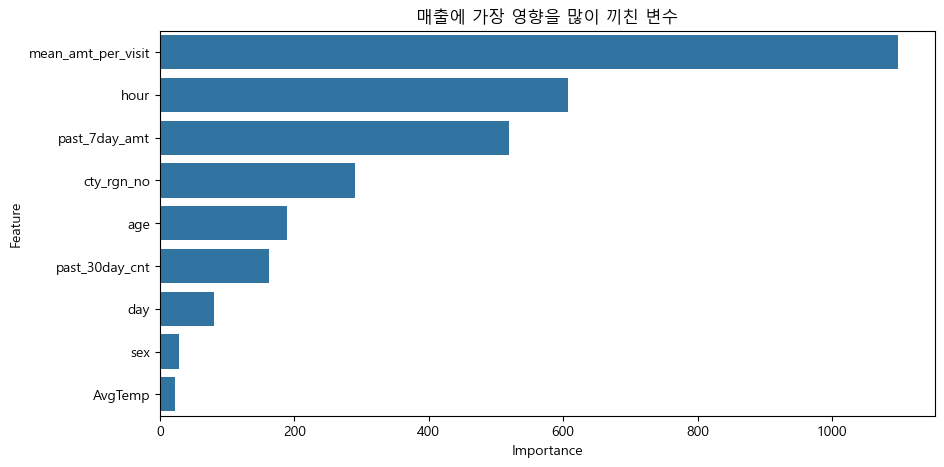

In [42]:
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("매출에 가장 영향을 많이 끼친 변수")
plt.show()


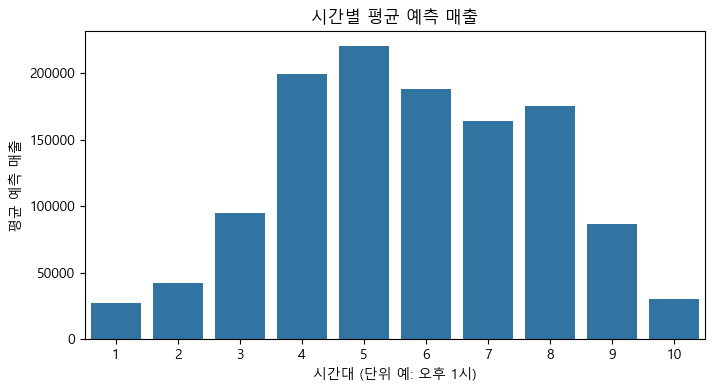

오후 5시에 가장 매출이 높았다.


In [43]:
#가장 영향을 준 변수인 'hour'(피처변수 제외)로 시간대에 따른 매출 확인
X_amt_test_copy = X_amt_test.copy()
X_amt_test_copy['predicted_amt'] = np.expm1(y_pred_amt)

# 시간대별 평균 예측 매출
mean_amt_by_hour = X_amt_test_copy.groupby('hour')['predicted_amt'].mean()

# 시각화
plt.figure(figsize=(8,4))
sns.barplot(x=mean_amt_by_hour.index, y=mean_amt_by_hour.values)
plt.title("시간별 평균 예측 매출")
plt.xlabel("시간대 (단위 예: 오후 1시)")
plt.ylabel("평균 예측 매출")
plt.show()
print("오후 5시에 가장 매출이 높았다.")

# 3. 커피 매장을 운영하면서 특정 외부 요인에 의해 성별을 예측(분류)
# H_0(귀무가설) : 특정한 외부 요인에 의해 성별을 예측할 수 없다.
# H_1(대립가설) : 특정한 외부 요인에 의해 성별을 예측할 수 있다.
- 대립가설 채택 : 특정한 외부 요인에 의해 성별을 어느정도 예측할 수 있다.✅

In [44]:
#가설 검정
def numerical_corr(df, target='amt'):
    print("수치형 변수와 amt 간의 Pearson 상관계수:")
    num_cols = df.select_dtypes(include=np.number).columns.drop(target)
    for col in num_cols:
        corr, p = pearsonr(df[col], df[target])
        print(f"{col:20s} | 상관계수: {corr:.4f}, p-value: {p:.4e}")

numerical_corr(df, target='amt')

print("이로써 p-value값은 모두 0.05보다 낮아 amt와 유의미한 관계를 가지고 있음을 알 수 있다.")

수치형 변수와 amt 간의 Pearson 상관계수:
cty_rgn_no           | 상관계수: 0.0610, p-value: 0.0000e+00
sex                  | 상관계수: -0.0125, p-value: 9.8319e-61
age                  | 상관계수: -0.0759, p-value: 0.0000e+00
hour                 | 상관계수: 0.0765, p-value: 0.0000e+00
cnt                  | 상관계수: 0.8860, p-value: 0.0000e+00
day                  | 상관계수: 0.0518, p-value: 0.0000e+00
AvgTemp              | 상관계수: 0.0171, p-value: 3.8443e-112
past_7day_amt        | 상관계수: 0.5654, p-value: 0.0000e+00
past_30day_cnt       | 상관계수: 0.4488, p-value: 0.0000e+00
mean_amt_per_visit   | 상관계수: -0.7125, p-value: 0.0000e+00
이로써 p-value값은 모두 0.05보다 낮아 amt와 유의미한 관계를 가지고 있음을 알 수 있다.


In [45]:
#모델링(다양한 수치형 변수들을 바탕으로 성별을 예측하는 분류 모델)
features_cnt =['amt','cnt', 'age', 'AvgTemp', 'hour', 'day', 'cty_rgn_no','mean_amt_per_visit','past_7day_amt','past_30day_cnt']

X = df[features_cnt]
y_sex = LabelEncoder().fit_transform(df['sex'])

X_train, X_test, y_sex_train, y_sex_test = train_test_split(X, y_sex, test_size=0.2, random_state=42)
model = LGBMClassifier()
model.fit(X_train, y_sex_train)
y_pred_sex = model.predict(X_test)

# 정확도
accuracy = accuracy_score(y_sex_test, y_pred_sex)
print("정확도 (Accuracy):", accuracy)

# 상세 리포트 (정밀도, 재현율 등)
print("\n분류 리포트 (Classification Report):")
print(classification_report(y_sex_test, y_pred_sex))

# 혼동 행렬
print("혼동 행렬 (Confusion Matrix):")
print(confusion_matrix(y_sex_test, y_pred_sex))

#결과
print("정확도는 약 62.1%이며 이는 전체 예측 중 62.1%만 정답을 맞췄다는 의미, 모델이 어느정도는 성별을 예측")
print("정밀도, 재현율, f1-score 모두 0.60 수준이며 여성을 더 잘 예측함을 알 수 있다.")
print("혼동행렬을 통해 남성 예측 정확도 약 59.5% / 여성 예측 정확도 64.6%로 알 수 있다.")

[LightGBM] [Info] Number of positive: 719044, number of negative: 670006
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020850 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1557
[LightGBM] [Info] Number of data points in the train set: 1389050, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.517652 -> initscore=0.070636
[LightGBM] [Info] Start training from score 0.070636
정확도 (Accuracy): 0.6211804885634231

분류 리포트 (Classification Report):
              precision    recall  f1-score   support

           0       0.61      0.60      0.60    167567
           1       0.63      0.65      0.64    179696

    accuracy                           0.62    347263
   macro avg       0.62      0.62      0.62    347263
weighted avg       0.62      0.62      0.62    347263

혼동 행렬 (Confusion Matrix):
[[ 99751  67816]
 [ 63734 115962]]
정확도는 약 62.1%이며 이는 전체 예측 중 62.1%만 정답을 맞췄다는 의미, 모델

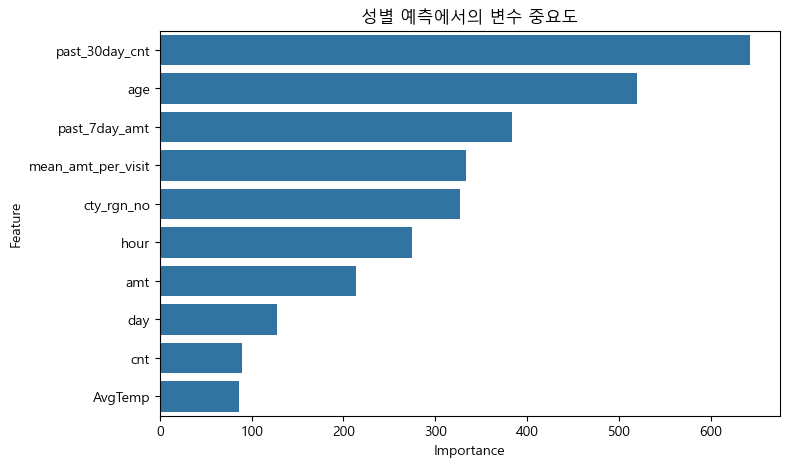

In [46]:
#성별을 예측하는데 가장 크게 작용한 변수 알아보기
importances = model.feature_importances_
feature_names = X.columns

# 시각화
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("성별 예측에서의 변수 중요도")
plt.show()

# 4. 요일에 따른 평균 커피 매출 영향(회귀)
# H_0(귀무가설) : 특정 요일이 커피 매출을 예측할 수 없다.
# H_1(대립가설) : 특정 요일이 커피 매출을 예측할 수 있다.
- 대립가설 채택 : 특정 요일로 커피 매출을 예측할 수 있다.(토요일)✅ 

In [47]:
corr, p_value = pearsonr(df['amt'],df['day'])

print(f"상관계수 : {corr}")
print(f"p-value : {p_value}")
#요일과 매출은 유의미한 관계는 있지만 거의 없는 것처럼 약하다.

상관계수 : 0.05177180419442668
p-value : 0.0


In [48]:
# 피처 선택
features_day = ['sex', 'age', 'hour', 'amt',
            'past_7day_amt', 'past_30day_cnt', 'mean_amt_per_visit', 'AvgTemp', 'cty_rgn_no']
X = df[features_day]
y_day = df['day']
#모델링(다양한 수치형 변수들을 바탕으로 구매횟수를를 예측하는 분류 모델)
X_train, X_test, y_day_train, y_day_test = train_test_split(X, y_day, test_size=0.2, random_state=42)
model = LGBMRegressor()
model.fit(X_train, y_day_train)
y_pred_day = model.predict(X_test)
y_day_rmse = np.sqrt(mean_squared_error(y_day_test, y_pred_day))
y_day_r2_score = r2_score(y_day_test,y_pred_day)
print("RMSE:", y_day_rmse)
print("즉, 약 {:.2f}배의 오차가 있다.".format(y_day_rmse))
print("R^2 (amt):", y_day_r2_score)
print("또한, 이 모델은 {:.2f}%의 설명력을 가진다.".format(y_day_r2_score * 100))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1296
[LightGBM] [Info] Number of data points in the train set: 1389050, number of used features: 9
[LightGBM] [Info] Start training from score 4.014294
RMSE: 1.2600968372063148
즉, 약 1.26배의 오차가 있다.
R^2 (amt): 0.6017675220645309
또한, 이 모델은 60.18%의 설명력을 가진다.


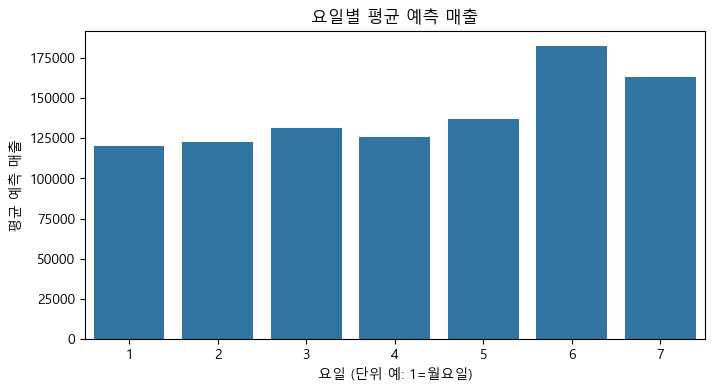

토요일에 매출이 가장 높다


In [49]:
X_amt_test_copy = X_amt_test.copy()
X_amt_test_copy['predicted_amt'] = np.expm1(y_pred_amt)

# 시간대별 평균 예측 매출
mean_amt_by_day = X_amt_test_copy.groupby('day')['predicted_amt'].mean()

# 시각화
plt.figure(figsize=(8,4))
sns.barplot(x=mean_amt_by_day.index, y=mean_amt_by_day.values)
plt.title("요일별 평균 예측 매출")
plt.xlabel("요일 (단위 예: 1=월요일)")
plt.ylabel("평균 예측 매출")
plt.show()
print("토요일에 매출이 가장 높다")

# 5. 연령별 매출금액의 소비 수준 패턴 파악하기(군집)

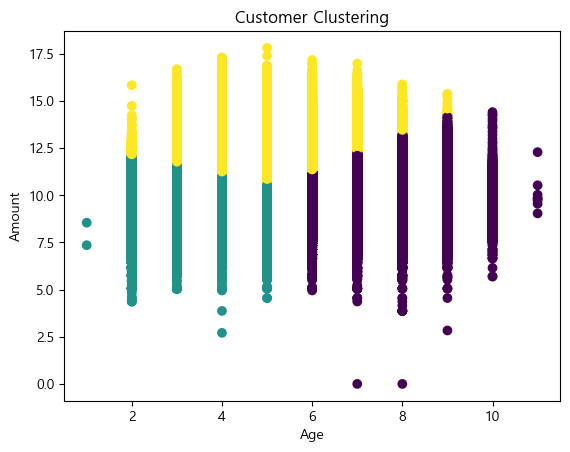

 노란색 : 가장 많이 소비하는 고객
 보라색 : 중간 정도로 소비하는 고객
 청록색 : 가장 적게 소비하는 고객


In [50]:
#연령대와 매출금액 간에 패턴 시각화하기
X = df[['age', 'amt']]

# KMeans 모델 적용
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# 클러스터 시각화
plt.scatter(X['age'], X['amt'], c=df['cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.title('Customer Clustering')
plt.show()
print(" 노란색 : 가장 많이 소비하는 고객" \
"\n 보라색 : 중간 정도로 소비하는 고객" \
"\n 청록색 : 가장 적게 소비하는 고객")